<a href="https://colab.research.google.com/github/psajaev1/COVID19Analysis/blob/master/CIS545projectdraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages and Loading data

In [ ]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11-utils
0 upgraded, 10 newly installed, 0 to remove and 29 not upgraded.
Need to get 40.7 MB of archives.
After this operation, 153 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [1

In [ ]:
### Install required packages
%%capture
!pip install pandasql


In [ ]:
import numpy as np 
import pandas as pd 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
import io 
import pandasql as ps

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# import downloaded CSV files
#Put them in this datacovid folder in google drive

path1 = "/content/drive/My Drive/datacovid/df_all_cases.csv"
path2 = "/content/drive/My Drive/datacovid/df_all_deaths.csv"
path3 = "/content/drive/My Drive/datacovid/df_us_combined.csv"
path4 = "/content/drive/My Drive/datacovid/df_us_jhu.csv"
path5 = "/content/drive/My Drive/datacovid/df_us_nyt.csv"

world_cases_df = pd.read_csv(path1)
world_deaths_df = pd.read_csv(path2)
us_combined_df = pd.read_csv(path3)
us_jhu_df = pd.read_csv(path4)
us_nyt_df = pd.read_csv(path5)

world_cases_df


,date,day,cases,province_state,country,lat,long
0,2020-01-22,0,0,NaN,Afghanistan,33.000000,65.000000
1,2020-01-22,0,0,NaN,Albania,41.153300,20.168300
2,2020-01-22,0,0,NaN,Algeria,28.033900,1.659600
3,2020-01-22,0,0,NaN,Andorra,42.506300,1.521800
4,2020-01-22,0,0,NaN,Angola,-11.202700,17.873900
...,...,...,...,...,...,...,...
26861,2020-05-01,100,6,NaN,Western Sahara,24.215500,-12.885800
26862,2020-05-01,100,16,NaN,Sao Tome and Principe,0.186360,6.613081
26863,2020-05-01,100,7,NaN,Yemen,15.552727,48.516388
26864,2020-05-01,100,1,NaN,Comoros,-11.645500,43.333300


# Setting up Local Connection to Apache Spark

In [ ]:
!apt install libkrb5-dev
!wget https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
! pip install pyspark --user
! pip install seaborn --user
! pip install plotly --user
! pip install imageio --user
! pip install folium --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  comerr-dev krb5-multidev libcom-err2 libgssrpc4 libkadm5clnt-mit11
  libkadm5srv-mit11 libkdb5-9
Suggested packages:
  doc-base krb5-doc krb5-user
The following NEW packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9 libkrb5-dev
The following packages will be upgraded:
  libcom-err2
1 upgraded, 7 newly installed, 0 to remove and 28 not upgraded.
Need to get 358 kB of archives.
After this operation, 1,992 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libcom-err2 amd64 1.44.1-1ubuntu1.3 [8,848 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgssrpc4 amd64 1.16-2ubuntu0.1 [54.2 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkdb5-9 amd64 1.16-2ubuntu0.1 [37.2 kB]
Get:4 http

In [ ]:
!apt update
!apt install gcc python-dev libkrb5-dev
!rm -rf yelp_*

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [908 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Pa

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('BIGDATAPROJECT').getOrCreate()


In [ ]:
%load_ext sparkmagic.magics

In [ ]:
#graph section
import networkx as nx
# SQLite RDBMS
import sqlite3
# Parallel processing
# import swifter

# NoSQL DB
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

import os
os.environ['SPARK_HOME'] = '/content/spark-2.4.5-bin-hadoop2.7'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext

In [ ]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)


#Exploratory Data Analysis
We will first combine the international data and make a spark dataframe from it


#test this

## testtstst

In [ ]:
!java -version

openjdk version "1.8.0_252"
OpenJDK Runtime Environment (build 1.8.0_252-8u252-b09-1~18.04-b09)
OpenJDK 64-Bit Server VM (build 25.252-b09, mixed mode)


In [ ]:
schema = StructType([
           StructField("date", DateType(), nullable=False),
           StructField("day", IntegerType(), nullable=False),
           StructField("cases", IntegerType(), nullable=False),
           StructField("country", StringType(), nullable=False),
           StructField("lat", FloatType(), nullable=False),
           StructField("long", FloatType(), nullable=False),
           StructField("deaths", IntegerType(), nullable=False)
         ])



world_comb_df = world_cases_df.drop(['province_state'], axis = 1)
world_comb_df['deaths'] = world_deaths_df['deaths']

world_comb_df['date'] = pd.to_datetime(world_comb_df.date)


world_sdf = spark.createDataFrame(world_comb_df, schema = schema)
world_sdf.show(5)

#testing_sdf = world_sdf.toPandas()


world_sdf.createOrReplaceTempView('world_sdf')

query = '''select day,sum(cases) as total_cases, sum(deaths) as total_deaths,country from world_sdf 
          group by country,day 
          order by country,day ASC  '''


comb_country_df = spark.sql(query)
comb_country_df.show(15)

comb_country_pd = comb_country_df.toPandas()

comb_country_pd

for ind, row in comb_country_pd.iterrows():

  if (comb_country_pd.at[ind,'day'] == 0): 
    comb_country_pd.at[ind,'daily_cases'] = comb_country_pd.at[ind,'total_cases'] 
    comb_country_pd.at[ind,'daily_deaths'] = comb_country_pd.at[ind,'total_deaths']
  else: 
    comb_country_pd.at[ind,'daily_cases'] = comb_country_pd.at[ind,'total_cases'] - comb_country_pd.at[ind - 1,'total_cases']
    comb_country_pd.at[ind,'daily_deaths'] = comb_country_pd.at[ind,'total_deaths'] - comb_country_pd.at[ind - 1,'total_deaths']

country_group_df = comb_country_pd.sort_values(by=['daily_deaths'])
country_group_df




world_mod_sdf = spark.createDataFrame(comb_country_pd)

world_mod_sdf.createOrReplaceTempView('world_mod_sdf')

query = '''select day, sum(total_cases) as global_cases, 
            sum(total_deaths) as global_deaths,
            sum(daily_cases) as global_daily_cases,
            sum(daily_deaths) as global_daily_deaths 
            from world_mod_sdf 
            group by day
            order by day ASC'''

world_total_sdf = spark.sql(query)
world_total_sdf.show(10)





+----------+---+-----+-----------+--------+-------+------+
|      date|day|cases|    country|     lat|   long|deaths|
+----------+---+-----+-----------+--------+-------+------+
|2020-01-22|  0|    0|Afghanistan|    33.0|   65.0|     0|
|2020-01-22|  0|    0|    Albania| 41.1533|20.1683|     0|
|2020-01-22|  0|    0|    Algeria| 28.0339| 1.6596|     0|
|2020-01-22|  0|    0|    Andorra| 42.5063| 1.5218|     0|
|2020-01-22|  0|    0|     Angola|-11.2027|17.8739|     0|
+----------+---+-----+-----------+--------+-------+------+
only showing top 5 rows

+---+-----------+------------+-----------+
|day|total_cases|total_deaths|    country|
+---+-----------+------------+-----------+
|  0|          0|           0|Afghanistan|
|  1|          0|           0|Afghanistan|
|  2|          0|           0|Afghanistan|
|  3|          0|           0|Afghanistan|
|  4|          0|           0|Afghanistan|
|  5|          0|           0|Afghanistan|
|  6|          0|           0|Afghanistan|
|  7|         

In [ ]:
#DATA VISUALIZATION 

world_total_df = world_total_sdf.toPandas()

graph_temp_df = world_total_df.drop(['day'],axis=1)

sns.lineplot(data=graph_temp_df)

plt.set_xlabel("Days since Jan 21st")



NameError: ignored

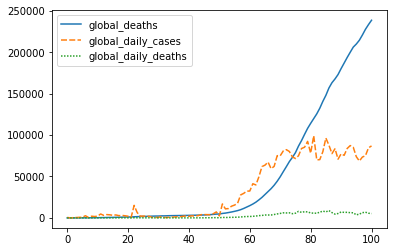

In [ ]:

graph_temp_df = world_total_df.drop(['global_cases', 'day'], axis=1)
sns.lineplot(data=graph_temp_df)

# from this graph it seems like that the quarantine that happened around the world worked 
# notice that the increase of global daily cases has decreased

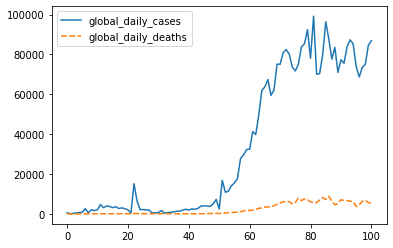

In [ ]:
graph_temp_df = world_total_df.drop(['global_cases', 'day','global_deaths'], axis=1)
sns.lineplot(data=graph_temp_df)

# Analysis: Does Latitude affect Virus transimission

We will now try to see if temperature has any difference on Cornona Virus Transmission. I will assume that the closer you are to the equator, the warmer that the temperature is. We can measure this by looking at latitude.

In [ ]:
# world_comb_df is our base dataframe without provinces or world_sdf
# will round latitude to nearest degree first



query = '''select day,country,sum(cases) as global_cases, sum(deaths) as global_deaths, round(avg(lat)) as lat
            from world_sdf
            group by country,day
            order by country,day '''

temp_lat_sdf = spark.sql(query)

temp_lat_sdf.show(5)

temp_lat_df = temp_lat_sdf.toPandas()


for ind, row in temp_lat_df.iterrows():

  if (temp_lat_df.at[ind,'day'] == 0): 
    temp_lat_df.at[ind,'daily_cases'] = temp_lat_df.at[ind,'global_cases'] 
    temp_lat_df.at[ind,'daily_deaths'] = temp_lat_df.at[ind,'global_deaths']
  else: 
    temp_lat_df.at[ind,'daily_cases'] = temp_lat_df.at[ind,'global_cases'] - temp_lat_df.at[ind - 1,'global_cases']
    temp_lat_df.at[ind,'daily_deaths'] = temp_lat_df.at[ind,'global_deaths'] - temp_lat_df.at[ind - 1,'global_deaths']


temp_lat_sdf = spark.createDataFrame(temp_lat_df)


temp_lat_sdf.createOrReplaceTempView('temp_lat_sdf')

query2 = '''select day,sum(global_cases) as global_cases,sum(global_deaths) as global_deaths, 
            sum(daily_cases) as new_daily_cases, sum(daily_deaths) as new_daily_deaths,lat
             from temp_lat_sdf group by lat,day
             order by sum(global_cases) '''

temp2_lat_sdf = spark.sql(query2)
temp2_lat_sdf.show(10)

temp2_lat_sdf.createOrReplaceTempView('temp2_lat_sdf')

query3 = '''select day, sum(new_daily_cases) as new_daily_cases,
            sum(new_daily_deaths) as new_daily_deaths, abs(lat) as latitude 
            from temp2_lat_sdf group by abs(lat), day
            order by sum(new_daily_cases)'''

world_lat_sdf = spark.sql(query3)

world_lat_sdf.show(20)


world_lat_df = world_lat_sdf.toPandas()




+---+-----------+------------+-------------+----+
|day|    country|global_cases|global_deaths| lat|
+---+-----------+------------+-------------+----+
|  0|Afghanistan|           0|            0|33.0|
|  1|Afghanistan|           0|            0|33.0|
|  2|Afghanistan|           0|            0|33.0|
|  3|Afghanistan|           0|            0|33.0|
|  4|Afghanistan|           0|            0|33.0|
+---+-----------+------------+-------------+----+
only showing top 5 rows

+---+------------+-------------+---------------+----------------+-----+
|day|global_cases|global_deaths|new_daily_cases|new_daily_deaths|  lat|
+---+------------+-------------+---------------+----------------+-----+
| 32|           0|            0|            0.0|             0.0| -3.0|
|  5|           0|            0|            0.0|             0.0| 65.0|
|  6|           0|            0|            0.0|             0.0| 54.0|
| 23|           0|            0|            0.0|             0.0|-16.0|
| 20|           0|   

We will now create a correlation matrix to see if there is a relationship between the growth of the virus and the latitude.

                           day  new_daily_cases  new_daily_deaths      latitude
day               1.000000e+00         0.211097          0.221130  9.253802e-18
new_daily_cases   2.110966e-01         1.000000          0.874316  5.168805e-02
new_daily_deaths  2.211300e-01         0.874316          1.000000  2.979047e-02
latitude          9.253802e-18         0.051688          0.029790  1.000000e+00


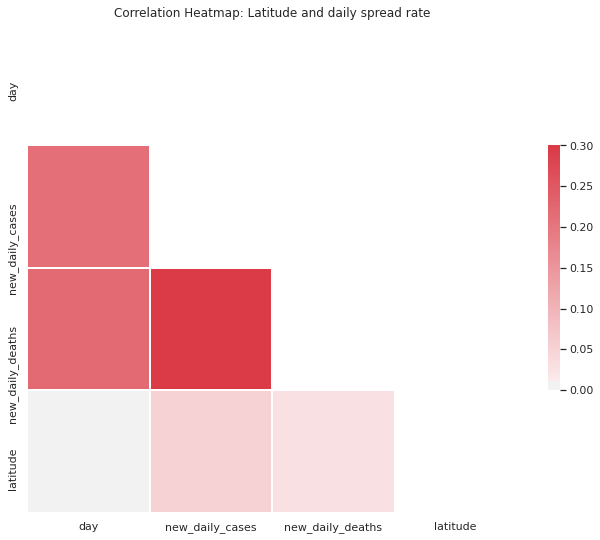

In [ ]:
correlation_matrix = world_lat_df.corr()
print(correlation_matrix)

sns.set(style="white")


# Compute the correlation matrix
#ASSIGN THE "corr" VARIABLE TO YOUR CORRELATION MATRIX
corr = correlation_matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap: Latitude and daily spread rate")
plt.show()

As we can see from the correlation map, it appears that there is a slight correlation between latitude and new daily cases. However the correlation with new daily deaths is slightly less. 

# Lets look at domestic data

Since it seems like some of the world data might not be very accurate, we will also look at the domestic data and see if we can get any insights from it

In [ ]:
# let us drop all columns with Nan in it, esentially making it the combined data set
# let us also only look at the JHU dataset since the numbers are similar between the two but JHU includes recovered and active 
us_combined_df = us_combined_df.dropna()
us_combined_df['date'] = pd.to_datetime(us_combined_df.date)
us_combined_df.sort_values(by='cases_jhu', ascending=False)



,date,fips,day,county,state,sub_region,region,lat,long,cases_nyt,deaths_nyt,cases_jhu,deaths_jhu,recovered,active
103308,2020-05-01,17031,101,Cook,Illinois,east_north_central,midwest,41.841448,-87.816588,38668,1673,38668.0,1673.0,0.0,36995.0
100481,2020-04-30,17031,100,Cook,Illinois,east_north_central,midwest,41.841448,-87.816588,36513,1607,36513.0,1607.0,0.0,34906.0
104414,2020-05-01,36059,101,Nassau,New York,mid_atlantic,northeast,40.740665,-73.589419,36161,2140,36161.0,1720.0,0.0,34441.0
101580,2020-04-30,36059,100,Nassau,New York,mid_atlantic,northeast,40.740665,-73.589419,35854,2111,35854.0,1700.0,0.0,34154.0
98756,2020-04-29,36059,99,Nassau,New York,mid_atlantic,northeast,40.740665,-73.589419,35505,2077,35505.0,1678.0,0.0,33827.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14588,2020-03-27,26095,66,Luce,Michigan,east_north_central,midwest,46.472274,-85.544712,1,0,0.0,0.0,0.0,0.0
21465,2020-03-30,56017,69,Hot Springs,Wyoming,mountain,west,43.719307,-108.442317,1,0,0.0,0.0,0.0,0.0
10432,2020-03-24,47041,63,DeKalb,Tennessee,east_south_central,south,35.976163,-85.836894,1,0,0.0,0.0,0.0,0.0
19408,2020-03-29,56017,68,Hot Springs,Wyoming,mountain,west,43.719307,-108.442317,1,0,0.0,0.0,0.0,0.0


We will now shape the dataframe and get rid of any unuseful rows. In this case, we will only examine JHU data because it is the same as the NYT data but also includes recovered and active

In [ ]:

us_combined_df



,date,fips,day,county,state,sub_region,region,lat,long,cases_nyt,deaths_nyt,cases_jhu,deaths_jhu,recovered,active
7006,2020-03-22,1003,61,Baldwin,Alabama,east_south_central,south,30.727750,-87.722071,2,0,2.0,0.0,0.0,0.0
7007,2020-03-22,1015,61,Calhoun,Alabama,east_south_central,south,33.774837,-85.826304,1,0,1.0,0.0,0.0,0.0
7008,2020-03-22,1017,61,Chambers,Alabama,east_south_central,south,32.913601,-85.390727,2,0,2.0,0.0,0.0,0.0
7009,2020-03-22,1043,61,Cullman,Alabama,east_south_central,south,34.130203,-86.868880,2,0,2.0,0.0,0.0,0.0
7010,2020-03-22,1051,61,Elmore,Alabama,east_south_central,south,32.597854,-86.144153,6,0,6.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105574,2020-05-01,56035,101,Sublette,Wyoming,mountain,west,42.765583,-109.913092,1,0,3.0,0.0,0.0,3.0
105575,2020-05-01,56037,101,Sweetwater,Wyoming,mountain,west,41.659439,-108.882788,11,0,18.0,0.0,0.0,18.0
105576,2020-05-01,56039,101,Teton,Wyoming,mountain,west,43.935225,-110.589080,65,1,96.0,0.0,0.0,96.0
105577,2020-05-01,56041,101,Uinta,Wyoming,mountain,west,41.287818,-110.547578,6,0,8.0,0.0,0.0,8.0


# Searching for relationships by region

Let us now group it together into regions and see if we can find anything interesting

In [ ]:
us_combined_sdf = spark.createDataFrame(us_combined_df)


us_combined_sdf.createOrReplaceTempView('us_combined_sdf')



query = '''select *
            from us_combined_sdf
            order by state,county,day'''


temp_sub_region_sdf = spark.sql(query)
temp_sub_region_sdf.show(75)


temp_sub_region_df = temp_sub_region_sdf.toPandas()


for ind, row in temp_sub_region_df.iterrows():
  if(ind == 0):
    temp_sub_region_df.at[ind,'daily_cases'] = temp_sub_region_df.at[ind,'cases_jhu'] 
    temp_sub_region_df.at[ind,'daily_deaths'] = temp_sub_region_df.at[ind,'deaths_jhu']
    temp_sub_region_df.at[ind,'daily_recover'] = temp_sub_region_df.at[ind,'recovered']
    temp_sub_region_df.at[ind,'daily_active'] = temp_sub_region_df.at[ind,'active']

  elif (temp_sub_region_df.at[ind,'county'] != temp_sub_region_df.at[ind-1,'county']): 
    temp_sub_region_df.at[ind,'daily_cases'] = temp_sub_region_df.at[ind,'cases_jhu'] 
    temp_sub_region_df.at[ind,'daily_deaths'] = temp_sub_region_df.at[ind,'deaths_jhu']
    temp_sub_region_df.at[ind,'daily_recover'] = temp_sub_region_df.at[ind,'recovered']
    temp_sub_region_df.at[ind,'daily_active'] = temp_sub_region_df.at[ind,'active']

  else: 
    temp_sub_region_df.at[ind,'daily_cases'] = temp_sub_region_df.at[ind,'cases_jhu'] - temp_sub_region_df.at[ind - 1,'cases_jhu']
    temp_sub_region_df.at[ind,'daily_deaths'] = temp_sub_region_df.at[ind,'deaths_jhu'] - temp_sub_region_df.at[ind - 1,'deaths_jhu']
    temp_sub_region_df.at[ind,'daily_recover'] = temp_sub_region_df.at[ind,'recovered'] - temp_sub_region_df.at[ind - 1,'recovered']
    temp_sub_region_df.at[ind,'daily_active'] = temp_sub_region_df.at[ind,'active'] - temp_sub_region_df.at[ind - 1,'active']


temp_sub_region_df.sort_values(by="daily_cases") 

+-------------------+----+---+-------+-------+------------------+------+-----------+------------+---------+----------+---------+----------+---------+------+
|               date|fips|day| county|  state|        sub_region|region|        lat|        long|cases_nyt|deaths_nyt|cases_jhu|deaths_jhu|recovered|active|
+-------------------+----+---+-------+-------+------------------+------+-----------+------------+---------+----------+---------+----------+---------+------+
|2020-03-24 00:00:00|1001| 63|Autauga|Alabama|east_south_central| south|32.53952745|-86.64408227|        1|         0|      1.0|       0.0|      0.0|   0.0|
|2020-03-25 00:00:00|1001| 64|Autauga|Alabama|east_south_central| south|32.53952745|-86.64408227|        4|         0|      4.0|       0.0|      0.0|   0.0|
|2020-03-26 00:00:00|1001| 65|Autauga|Alabama|east_south_central| south|32.53952745|-86.64408227|        6|         0|      6.0|       0.0|      0.0|   0.0|
|2020-03-27 00:00:00|1001| 66|Autauga|Alabama|east_south_c

,date,fips,day,county,state,sub_region,region,lat,long,cases_nyt,deaths_nyt,cases_jhu,deaths_jhu,recovered,active,daily_cases,daily_deaths,daily_recover,daily_active
58190,2020-04-23,36071,93,Orange,New York,mid_atlantic,northeast,41.403375,-74.302408,6816,190,6816.0,268.0,0.0,6548.0,-336.0,24.0,0.0,-360.0
58350,2020-04-23,36079,93,Putnam,New York,mid_atlantic,northeast,41.426301,-73.749655,615,41,615.0,7.0,0.0,608.0,-216.0,0.0,0.0,-216.0
76915,2020-04-17,47037,87,Davidson,Tennessee,east_south_central,south,36.170074,-86.786461,1597,20,1307.0,19.0,0.0,1288.0,-185.0,0.0,0.0,-185.0
76911,2020-04-13,47037,83,Davidson,Tennessee,east_south_central,south,36.170074,-86.786461,1385,16,1207.0,16.0,0.0,1191.0,-142.0,3.0,0.0,-145.0
3265,2020-04-09,4017,79,Navajo,Arizona,mountain,west,35.399771,-110.321898,286,7,286.0,1.0,0.0,0.0,-118.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59040,2020-03-22,36119,61,Westchester,New York,mid_atlantic,northeast,41.162784,-73.757417,1873,0,1873.0,0.0,0.0,0.0,1873.0,0.0,0.0,0.0
57953,2020-03-22,36059,61,Nassau,New York,mid_atlantic,northeast,40.740665,-73.589419,1900,7,1900.0,4.0,0.0,0.0,1900.0,4.0,0.0,0.0
57970,2020-04-08,36059,78,Nassau,New York,mid_atlantic,northeast,40.740665,-73.589419,18548,701,18548.0,500.0,0.0,0.0,1938.0,0.0,0.0,0.0
20772,2020-04-10,17031,80,Cook,Illinois,east_north_central,midwest,41.841448,-87.816588,12472,398,12472.0,399.0,0.0,0.0,1952.0,89.0,0.0,0.0


# Daily increases on the data 
Let us now look at the daily trends and see if there is anything interesting

In [ ]:

us_combined_df = temp_sub_region_df
us_daily_sdf = spark.createDataFrame(us_combined_df)

us_daily_sdf.createOrReplaceTempView('us_daily_sdf')

query = '''select day, sub_region, sum(daily_cases) as cases_sub_region, 
          sum(daily_deaths) as deaths_sub_region, sum(daily_recover) as recover_sub_region,
           sum(daily_active) as active_sub_region from us_daily_sdf 
           group by day,sub_region
           order by cases_sub_region DESC'''

us_sub_region_sdf = spark.sql(query)

us_sub_region_sdf.show(25)



+---+------------+----------------+-----------------+------------------+-----------------+
|day|  sub_region|cases_sub_region|deaths_sub_region|recover_sub_region|active_sub_region|
+---+------------+----------------+-----------------+------------------+-----------------+
| 78|mid_atlantic|         11874.0|            525.0|               0.0|              0.0|
| 74|mid_atlantic|         11677.0|            315.0|               0.0|              0.0|
| 79|mid_atlantic|         11147.0|            531.0|               0.0|              0.0|
| 80|mid_atlantic|         10872.0|            501.0|               0.0|              0.0|
| 73|mid_atlantic|         10795.0|            216.0|               0.0|              0.0|
| 86|mid_atlantic|         10326.0|            616.0|               0.0|           9710.0|
| 95|mid_atlantic|         10160.0|            395.0|               0.0|           9765.0|
| 77|mid_atlantic|          9731.0|            766.0|               0.0|              0.0|

Below I made a graph for each column in the above dataframe separated by sub_region. I noticed that recovered is always 0 so we can drop this column as a result. I will also drop active because it isn't even prevelant until halfway through the data.

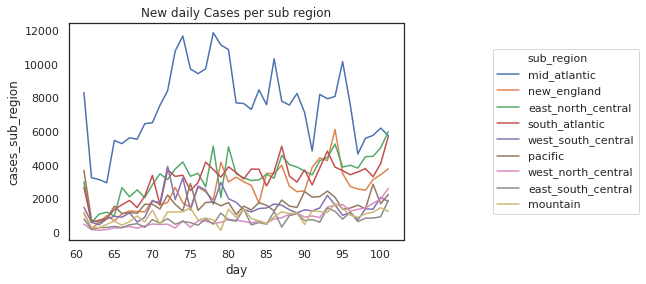

In [ ]:
us_sub_region_df = us_sub_region_sdf.toPandas()

#us_sub_region_df = us_sub_region_df.drop(['day'],axis=1)

sns.lineplot(x='day',y='cases_sub_region',data=us_sub_region_df, hue = 'sub_region').set(title='New daily Cases per sub region')
plt.legend(loc='center left', bbox_to_anchor=(1.25,0.5),ncol=1)

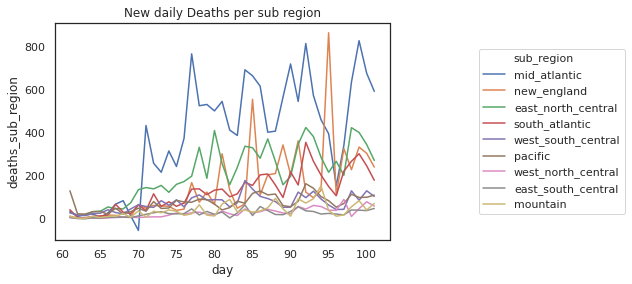

In [ ]:
sns.lineplot(x='day',y='deaths_sub_region',data=us_sub_region_df, hue = 'sub_region').set(title='New daily Deaths per sub region')
plt.legend(loc='center left', bbox_to_anchor=(1.25,0.5),ncol=1)

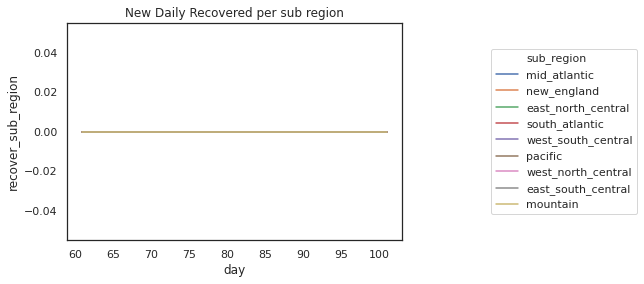

In [ ]:
sns.lineplot(x='day',y='recover_sub_region',data=us_sub_region_df, hue = 'sub_region').set(title='New Daily Recovered per sub region')
plt.legend(loc='center left', bbox_to_anchor=(1.25,0.5),ncol=1)

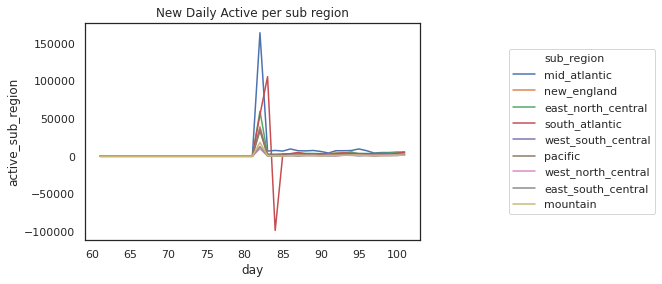

In [ ]:
sns.lineplot(x='day',y='active_sub_region',data=us_sub_region_df, hue = 'sub_region').set(title='New Daily Active per sub region')
plt.legend(loc='center left', bbox_to_anchor=(1.25,0.5),ncol=1)

It seems like the daily statistics are remarkably inconsistent but there are some general trends that we can see. For example, there are generally more cases and deaths in the mid_atlantic area.

# Cumulative Data by region 

In [ ]:
query = '''select day, sub_region, sum(cases_jhu) as total_cases, 
            sum(deaths_jhu) as total_deaths, sum(recovered) as total_recovered,
            sum(active) as total_active
            from us_daily_sdf group by sub_region,day
              '''

us_cum_data_sdf = spark.sql(query)

us_cum_data_sdf.show(15)

us_cum_data_df = us_cum_data_sdf.toPandas()

+---+------------------+-----------+------------+---------------+------------+
|day|        sub_region|total_cases|total_deaths|total_recovered|total_active|
+---+------------------+-----------+------------+---------------+------------+
| 96|          mountain|    33803.0|      1370.0|            0.0|     32433.0|
| 74|west_south_central|    20876.0|       573.0|            0.0|         0.0|
| 69|west_north_central|     2676.0|        40.0|            0.0|         0.0|
| 86|west_north_central|    12983.0|       415.0|            0.0|     12568.0|
| 87|          mountain|    23258.0|       756.0|            0.0|     22502.0|
| 75|west_south_central|    22215.0|       661.0|            0.0|         0.0|
| 72|      mid_atlantic|    68687.0|       924.0|            0.0|         0.0|
| 80|      mid_atlantic|   153954.0|      4395.0|            0.0|         0.0|
| 63|east_south_central|     1313.0|         7.0|            0.0|         0.0|
| 62|    south_atlantic|     3344.0|        48.0|   

Let us now look at this relationships graphically 

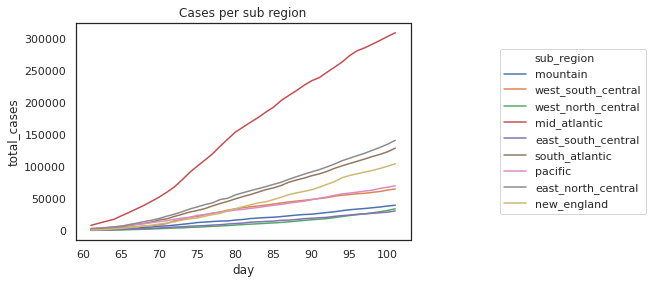

In [ ]:
sns.lineplot(x='day',y='total_cases',data=us_cum_data_df, hue = 'sub_region').set(title='Cases per sub region')
plt.legend(loc='center left', bbox_to_anchor=(1.25,0.5),ncol=1)

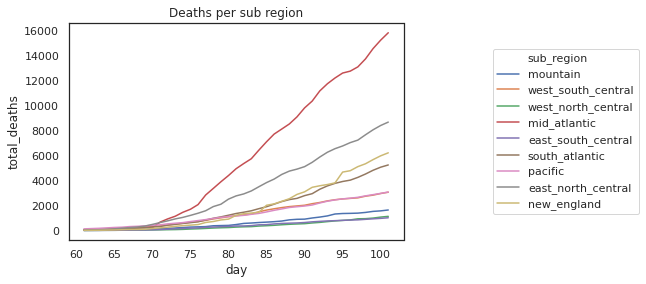

In [ ]:
sns.lineplot(x='day',y='total_deaths',data=us_cum_data_df, hue = 'sub_region').set(title='Deaths per sub region')
plt.legend(loc='center left', bbox_to_anchor=(1.25,0.5),ncol=1)

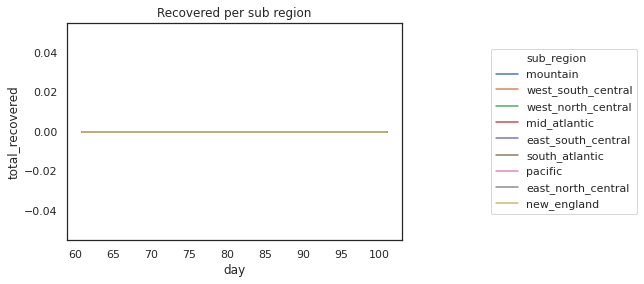

In [ ]:
sns.lineplot(x='day',y='total_recovered',data=us_cum_data_df, hue = 'sub_region').set(title='Recovered per sub region')
plt.legend(loc='center left', bbox_to_anchor=(1.25,0.5),ncol=1)

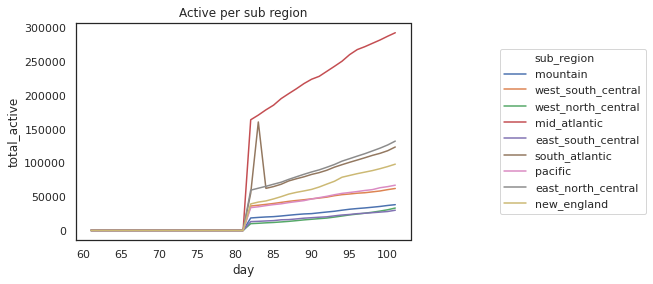

In [ ]:
sns.lineplot(x='day',y='total_active',data=us_cum_data_df, hue = 'sub_region').set(title='Active per sub region')
plt.legend(loc='center left', bbox_to_anchor=(1.25,0.5),ncol=1)

# Relationships by state


Let us now look at relationships by grouping by states. We will first look at the current situation

In [ ]:
#us_combined_df = us_combined_df.drop(['recovered','active'],axis=1)

query = '''select state, sum(daily_cases) as total_cases, 
            sum(daily_deaths) as total_deaths 
            from us_daily_sdf 
            group by state
            order by total_cases DESC
             '''

us_total_sdf = spark.sql(query)

us_total_sdf.show(51)

+--------------------+-----------+------------+
|               state|total_cases|total_deaths|
+--------------------+-----------+------------+
|            New York|   138624.0|      5640.0|
|          New Jersey|   120607.0|      7538.0|
|       Massachusetts|    63885.0|      3709.0|
|            Illinois|    55692.0|      2455.0|
|          California|    52026.0|      2124.0|
|        Pennsylvania|    49579.0|      2635.0|
|            Michigan|    40682.0|      3821.0|
|             Florida|    34720.0|      1314.0|
|               Texas|    29686.0|       840.0|
|           Louisiana|    28648.0|      1927.0|
|         Connecticut|    28393.0|      2337.0|
|             Georgia|    25774.0|      1155.0|
|            Maryland|    23472.0|      1080.0|
|                Ohio|    18743.0|      1003.0|
|             Indiana|    18630.0|      1062.0|
|            Virginia|    16900.0|       581.0|
|            Colorado|    15593.0|       817.0|
|          Washington|    14560.0|      

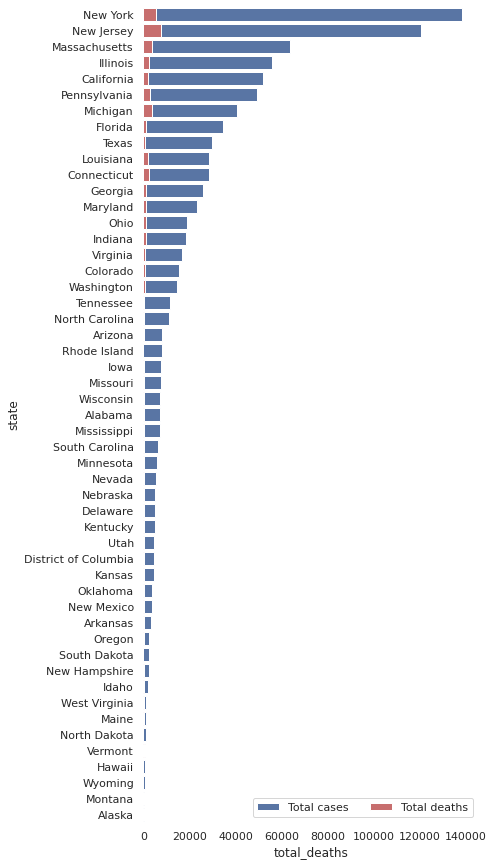

In [ ]:
# make horizantal plot of this

us_total_df = us_total_sdf.toPandas()

f, ax = plt.subplots(figsize = (6,15))
sns.barplot(x = 'total_cases', y = 'state', data = us_total_df,
            label = 'Total cases', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = 'total_deaths', y = 'state', data = us_total_df,
            label = 'Total deaths', color = 'r', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.show()

Let us see if we can use the data to see if there are any large differences in the quality of treatement between states. The metric we will use is total cases/ total deaths

In [ ]:
for ind, row in us_total_df.iterrows():
  if (us_total_df.at[ind,'total_deaths'] == 0):
    us_total_df.at[ind,'cases_per_death'] = us_total_df.at[ind,'total_cases']
  else:
    us_total_df.at[ind,'cases_per_death'] = us_total_df.at[ind,'total_cases'] / us_total_df.at[ind,'total_deaths'] 


us_total_df.sort_values(by='cases_per_death',ascending=False)
us_total_df


,state,total_cases,total_deaths,cases_per_death
0,New York,138624.0,5640.0,24.578723
1,New Jersey,120607.0,7538.0,15.999867
2,Massachusetts,63885.0,3709.0,17.224319
3,Illinois,55692.0,2455.0,22.685132
4,California,52026.0,2124.0,24.494350
5,Pennsylvania,49579.0,2635.0,18.815560
6,Michigan,40682.0,3821.0,10.646951
7,Florida,34720.0,1314.0,26.423135
8,Texas,29686.0,840.0,35.340476
9,Louisiana,28648.0,1927.0,14.866632


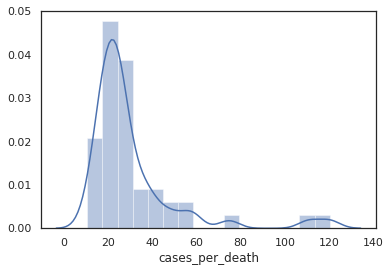

In [ ]:
us_total_df = us_total_df[us_total_df.state != 'Rhode Island']
us_total_df = us_total_df[us_total_df.state != 'Wyoming']

sns.distplot(us_total_df['cases_per_death'])


# Preparing the model
Let us first get rid of any unnecessary columns and group by state

In [ ]:
us_combined_df

,date,fips,day,county,state,sub_region,region,lat,long,cases_nyt,deaths_nyt,cases_jhu,deaths_jhu,recovered,active,daily_cases,daily_deaths,daily_recover,daily_active
0,2020-03-24,1001,63,Autauga,Alabama,east_south_central,south,32.539527,-86.644082,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2020-03-25,1001,64,Autauga,Alabama,east_south_central,south,32.539527,-86.644082,4,0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
2,2020-03-26,1001,65,Autauga,Alabama,east_south_central,south,32.539527,-86.644082,6,0,6.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
3,2020-03-27,1001,66,Autauga,Alabama,east_south_central,south,32.539527,-86.644082,6,0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-03-28,1001,67,Autauga,Alabama,east_south_central,south,32.539527,-86.644082,6,0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97719,2020-04-27,56043,97,Washakie,Wyoming,mountain,west,43.904516,-107.680187,4,0,8.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0
97720,2020-04-28,56043,98,Washakie,Wyoming,mountain,west,43.904516,-107.680187,4,0,8.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0
97721,2020-04-29,56043,99,Washakie,Wyoming,mountain,west,43.904516,-107.680187,4,0,8.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0
97722,2020-04-30,56043,100,Washakie,Wyoming,mountain,west,43.904516,-107.680187,4,0,8.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0


In [ ]:



us_combined_df['weekday'] = us_combined_df['date'].apply(lambda x: x.weekday() + 1)

us_combined_df = us_combined_df.drop(['date','fips','cases_nyt','deaths_nyt', 'recovered','active','daily_recover','daily_active', 'sub_region'], axis=1)


us_daily_sdf = spark.createDataFrame(us_combined_df)

us_daily_sdf.createOrReplaceTempView('us_daily_sdf')

query = ''' select day,weekday,state,sum(cases_jhu) as total_cases, sum(deaths_jhu) as total_deaths, 
            sum(daily_cases) as new_cases, sum(daily_deaths) as new_deaths, avg(lat) as lat, avg(long) as long
            from us_daily_sdf 
            group by day,state,weekday
            order by new_deaths
            ''' 

us_daily_sdf = spark.sql(query)

us_daily_sdf.createOrReplaceTempView('us_daily_sdf2')

query = ''' select * from us_daily_sdf2 
            where new_cases >= 0 and new_deaths >= 0'''

us_daily_sdf2 = spark.sql(query)

us_daily_sdf2.show(15)

+---+-------+--------------+-----------+------------+---------+----------+------------------+-------------------+
|day|weekday|         state|total_cases|total_deaths|new_cases|new_deaths|               lat|               long|
+---+-------+--------------+-----------+------------+---------+----------+------------------+-------------------+
| 68|      7| New Hampshire|      214.0|         2.0|     27.0|       0.0| 43.34434401222222| -71.60780385111111|
| 63|      2|        Alaska|       34.0|         0.0|      4.0|       0.0| 60.42322667833333|-143.66683741666665|
| 68|      7|        Alaska|      102.0|         1.0|     17.0|       0.0| 60.42322667833333|-143.66683741666665|
| 98|      2|       Wyoming|      536.0|         1.0|     16.0|       0.0|43.096464930952386|-107.38051198095239|
| 70|      2|      Kentucky|      612.0|         9.0|    190.0|       0.0| 37.74317893169231| -85.37071244215386|
| 74|      6|  Rhode Island|      565.0|         3.0|      0.0|       0.0|      41.65514

In [ ]:
us_daily_df = us_daily_sdf2.toPandas()
us_daily_df['total_cases'] = np.log(us_daily_df['total_cases'] + 1)
us_daily_df['total_deaths'] = np.log(us_daily_df['total_deaths'] + 1)
us_daily_df['new_cases'] = np.log(us_daily_df['new_cases'] + 1)
us_daily_df['new_deaths'] = np.log(us_daily_df['new_deaths'] + 1)

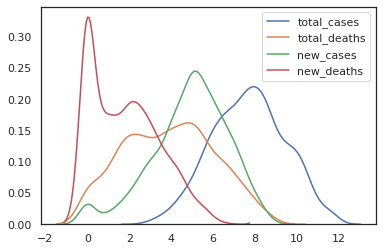

In [ ]:
# distribution 
sns.kdeplot(us_daily_df['total_cases'])
sns.kdeplot(us_daily_df['total_deaths'])
sns.kdeplot(us_daily_df['new_cases'])
sns.kdeplot(us_daily_df['new_deaths'])


Let us now convert the categorical columns by one hot encoding them

In [ ]:
us_daily_df['weekday'] = us_daily_df['weekday'].astype('category')
us_daily_df['state'] = us_daily_df['state'].astype('category')

us_daily_df = pd.get_dummies(us_daily_df, columns=['weekday'])
us_daily_df = pd.get_dummies(us_daily_df, columns=['state'])

us_daily_df

,day,total_cases,total_deaths,new_cases,new_deaths,lat,long,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,state_California,state_Colorado,state_Connecticut,state_Delaware,state_District of Columbia,state_Florida,state_Georgia,state_Hawaii,state_Idaho,state_Illinois,state_Indiana,state_Iowa,state_Kansas,state_Kentucky,state_Louisiana,state_Maine,state_Maryland,state_Massachusetts,state_Michigan,state_Minnesota,state_Mississippi,state_Missouri,state_Montana,state_Nebraska,state_Nevada,state_New Hampshire,state_New Jersey,state_New Mexico,state_New York,state_North Carolina,state_North Dakota,state_Ohio,state_Oklahoma,state_Oregon,state_Pennsylvania,state_Rhode Island,state_South Carolina,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,82,7.438972,1.386294,0.000000,0.000000,41.655142,-71.464105,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,85,5.662960,0.693147,1.791759,0.000000,43.096465,-107.380512,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,98,6.285998,0.693147,2.833213,0.000000,43.096465,-107.380512,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,82,8.427050,4.499810,5.379897,0.000000,35.613574,-79.387042,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,64,4.189655,0.000000,3.044522,0.000000,46.764958,-111.427874,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,100,11.679922,8.885856,7.835184,6.126869,40.286441,-74.622450,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2067,77,11.050890,7.218910,8.121480,6.133398,42.705002,-75.607907,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2068,90,11.624699,8.283999,7.905073,6.242223,42.705002,-75.607907,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2069,92,11.460263,8.546946,8.622634,6.447306,40.286441,-74.622450,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Split data into test and train sets

In [ ]:
# create features and labels
label = us_daily_df['new_cases']
features = us_daily_df.drop(['new_cases', 'new_deaths'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.20, random_state=42)



Let Us now use PCA to determine which dimensions are important

[0.04947667 0.03156709 0.02990031 0.01979266 0.01934088 0.01921163
 0.01916648 0.01889852 0.01879529 0.0167364  0.01649039 0.01624947
 0.01623328 0.01623029 0.01622233 0.01622158 0.01621915 0.01621735
 0.01621466 0.01621296 0.01621025 0.01620947 0.0162073  0.01620515
 0.01620424 0.01620382 0.01620067 0.01619949 0.01619863 0.0161973
 0.0161942  0.01619292 0.0161917  0.01619094 0.01618846 0.01618484
 0.01618093 0.01618024 0.0161759  0.01617369 0.01617325 0.0161716
 0.0161692  0.01616888 0.01616679 0.01615901 0.01615555 0.01615263
 0.01614653 0.01614437 0.01593855 0.01574857 0.01565758 0.01565075
 0.01539104 0.01535926 0.01443785 0.00055569 0.00036121 0.00000284
 0.00000129 0.         0.        ]


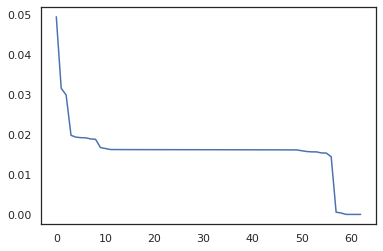

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
pca = PCA(n_components = 63)
pca.fit(x_train)
np.set_printoptions(suppress=True)
print(pca.explained_variance_ratio_)
plt.figure()


plt.plot(np.arange(63),pca.explained_variance_ratio_)


In [ ]:
# let us now transform our data set into the PCA one 

pca = PCA(n_components = 53)

x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)






# Linear Regression

We will now perform Linear Regression on our model after adjusting the dataframe by doing PCA. 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

regr_model = linear_model.LinearRegression()
regr_model.fit(x_train, y_train)
y_pred = regr_model.predict(x_test)
y_train_pred = regr_model.predict(x_train)
test_score = np.sqrt(mean_squared_error(y_test, y_pred))
train_score = np.sqrt(mean_squared_error(y_train_pred, y_train))
print(train_score)
print(test_score)
regr_model.score(x_test, y_test)



0.9801030064014631
14.774355747125385


-57.355291841368896

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

estimator = RandomForestRegressor()
parameters = {'n_estimators':[70,80,90,100,110,120],'max_depth':[60,70,80,90,100,110]}  
clf = GridSearchCV(estimator, parameters, n_jobs = -1)
clf.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [ ]:
print(clf.best_params_)
print(clf.best_score_)
print(clf.best_estimator_.score(x_test,y_test))



{'max_depth': 80, 'n_estimators': 110}
0.7143481649315574
-0.4186081691984016


In [ ]:
# Your code goes here
import sklearn.metrics


rando = RandomForestRegressor(n_estimators=120, max_depth=90, n_jobs=-1)
rando = rando.fit(x_train,y_train)
y_pred = rando.predict(x_test)
test_score = np.sqrt(mean_squared_error(y_test, y_pred))
print(test_score)
print(rando.score(x_test, y_test))


2.2656539095278636
-0.3723038474098652


# Lets try using Apache Spark ML 



In [ ]:
train_sdf = spark.createDataFrame(us_daily_df)

train_sdf.show(15)


+---+------------------+------------------+------------------+----------+------------------+-------------------+---------+---------+---------+---------+---------+---------+---------+-------------+------------+-------------+--------------+----------------+--------------+-----------------+--------------+--------------------------+-------------+-------------+------------+-----------+--------------+-------------+----------+------------+--------------+---------------+-----------+--------------+-------------------+--------------+---------------+-----------------+--------------+-------------+--------------+------------+-------------------+----------------+----------------+--------------+--------------------+------------------+----------+--------------+------------+------------------+------------------+--------------------+------------------+---------------+-----------+----------+-------------+--------------+----------------+-------------------+---------------+-------------+
|day|       total_

# Apache Spark PCA

In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline

feature_columns = ['day','total_cases','total_deaths','lat','long','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6','weekday_7','state_Alabama','state_Alaska','state_Arizona','state_Arkansas','state_California','state_Colorado','state_Connecticut','state_Delaware','state_District of Columbia','state_Florida','state_Georgia','state_Hawaii','state_Idaho','state_Illinois','state_Indiana','state_Iowa','state_Kansas','state_Kentucky','state_Louisiana','state_Maine','state_Maryland','state_Massachusetts','state_Michigan','state_Minnesota','state_Mississippi','state_Missouri','state_Montana','state_Nebraska','state_Nevada','state_New Hampshire','state_New Jersey','state_New Mexico','state_New York','state_North Carolina','state_North Dakota','state_Ohio','state_Oklahoma','state_Oregon','state_Pennsylvania','state_Rhode Island','state_South Carolina','state_South Dakota','state_Tennessee','state_Texas','state_Utah','state_Vermont','state_Virginia','state_Washington','state_West Virginia','state_Wisconsin','state_Wyoming']

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
pipeline = Pipeline(stages=[assembler])
model = pipeline.fit(train_sdf)
modified_data_sdf = model.transform(train_sdf)



In [ ]:
# Your code goes here
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.mllib.linalg.distributed import RowMatrix


pca = PCA(k=54, inputCol="features", outputCol="pca_features")
pca_model = pca.fit(modified_data_sdf)

print(pca_model.explainParams())

result = pca_model.transform(modified_data_sdf)


result.show(5)


modified_data_sdf = result.select(['pca_features', 'new_cases'])





inputCol: input column name (current: features)
k: the number of principal components (> 0) (current: 54)
outputCol: output column name (default: PCA_99fcf2bb5058__output, current: pca_features)
+---+-----------------+------------------+-----------------+----------+------------------+-------------------+---------+---------+---------+---------+---------+---------+---------+-------------+------------+-------------+--------------+----------------+--------------+-----------------+--------------+--------------------------+-------------+-------------+------------+-----------+--------------+-------------+----------+------------+--------------+---------------+-----------+--------------+-------------------+--------------+---------------+-----------------+--------------+-------------+--------------+------------+-------------------+----------------+----------------+--------------+--------------------+------------------+----------+--------------+------------+------------------+------------------+-

Let us now split the training data

In [ ]:
# Your code goes here
splits = modified_data_sdf.randomSplit([0.8, 0.2])
train_sdf = splits[0]
train_label_sdf = train_sdf['new_cases']
#train_sdf = train_sdf.drop("new_cases")
test_sdf = splits[1]
test_label_sdf = test_sdf['new_cases']
#test_sdf = test_sdf.drop("new_cases")
test_sdf.show(5)

+--------------------+------------------+
|        pca_features|         new_cases|
+--------------------+------------------+
|[-157.57947876930...|               0.0|
|[-157.57428026211...|3.2188758248682006|
|[-146.98109279973...|1.0986122886681098|
|[-146.98022639234...|1.9459101490553132|
|[-146.97754399155...|2.0794415416798357|
+--------------------+------------------+
only showing top 5 rows



# Linear Regression Spark ML 



In [ ]:
from pyspark.ml.regression import LinearRegression

# Your code goes here


lr_model = LinearRegression(featuresCol='pca_features', labelCol='new_cases')
lr_model = lr_model.fit(train_sdf)

In [ ]:
trainingSummary = lr_model.summary

print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)



RMSE: 0.942794
r2: 0.731419


In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

predictions = lr_model.transform(test_sdf)
lr_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol='new_cases')

test_rmse_orig = lr_evaluator.evaluate(predictions)

print("RMSE: %f" % test_rmse_orig)



RMSE: 0.883988


# Random Forest Spark ML 

In [ ]:
from pyspark.ml.regression import RandomForestRegressor
# Your code goes here
print("asdf")

rf_model = RandomForestRegressor()
rf_model.setParams(featuresCol="pca_features",labelCol="new_cases",numTrees=60, maxDepth=25)
print("asdf")

rf = rf_model.fit(train_sdf)

print("asdf")
predictions = rf.transform(train_sdf)
for_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="new_cases")

train_rmse_rf = for_evaluator.evaluate(predictions)
print(train_rmse_rf)


predictions = rf.transform(test_sdf)


# Your code goes here
rmse_rf = for_evaluator.evaluate(predictions) 
print(rmse_rf)

asdf
asdf
asdf
0.3674701339611119
0.9032221377066453
